Jean Halaby
10/29/25
Project 2 Part 2

This notebook will showcase the web scraping portion and analysis of Project 2. I will be using data from Basketball Reference and analyzing the Atlantic Division of the NBA.

In [9]:
# Imports
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO


In [10]:
# Five URL Pages of Data
urls = {
    "BOS": "https://www.basketball-reference.com/teams/BOS/2024.html",
    "BRK": "https://www.basketball-reference.com/teams/BRK/2024.html",
    "NYK": "https://www.basketball-reference.com/teams/NYK/2024.html",
    "PHI": "https://www.basketball-reference.com/teams/PHI/2024.html",
    "TOR": "https://www.basketball-reference.com/teams/TOR/2024.html"
}

# Data Scraping
all_data = []

for team, url in urls.items():
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Finding commented out section
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))
    
    # Look for the "team_and_opponent" table
    for comment in comments:
        if "team_and_opponent" in comment:
            table = pd.read_html(StringIO(comment))[0]
            table["Team"] = team
            all_data.append(table)
            break  

# All teams into a data frame
data = pd.concat(all_data)
data.head()

,Unnamed: 0,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Team
0,Team,82.0,19830,3601,7396,0.487,1351,3482,0.388,2250,...,876,2923,3799,2207,557,538,979,1326,9887,BOS
1,Team/G,NaN,241.8,43.9,90.2,0.487,16.5,42.5,0.388,27.4,...,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6,BOS
2,Lg Rank,NaN,7,4,8,8.000,1,1,2.000,27,...,14,1,2,14,27,1,1,2,2,BOS
3,Year/Year,NaN,-0.8%,4.1%,1.6%,0.011,2.7%,-0.3%,0.011,4.9%,...,10.1%,0.1%,2.2%,1.0%,6.9%,25.1%,-10.6%,-14.0%,2.2%,BOS
4,Opponent,82.0,19830,3403,7515,0.453,1059,3008,0.352,2344,...,907,2645,3552,2042,510,304,986,1416,8957,BOS


In [8]:
# Test to See Data
data["Team"].unique()

array(['BOS', 'BRK', 'NYK', 'PHI', 'TOR'], dtype=object)

In [14]:
# Cleaning Data
data = data.dropna()
data.columns = [c.lower().replace('%', '_pct').replace(' ', '_') for c in data.columns]

# Keep Columns
cols = ['team', 'fg_pct', '3p_pct', 'ft_pct', 'pts', 'ast', 'tov', 'trb']
data = data[cols]

# Displaying Data
data.head()

,team,fg_pct,3p_pct,ft_pct,pts,ast,tov,trb
0,BOS,0.487,0.388,0.807,9887,2207,979,3799
4,BOS,0.453,0.352,0.768,8957,2042,986,3552
0,BRK,0.456,0.362,0.756,9050,2102,1076,3613
4,BRK,0.470,0.372,0.807,9287,2088,1035,3631
0,NYK,0.465,0.369,0.780,9249,1998,1085,3704


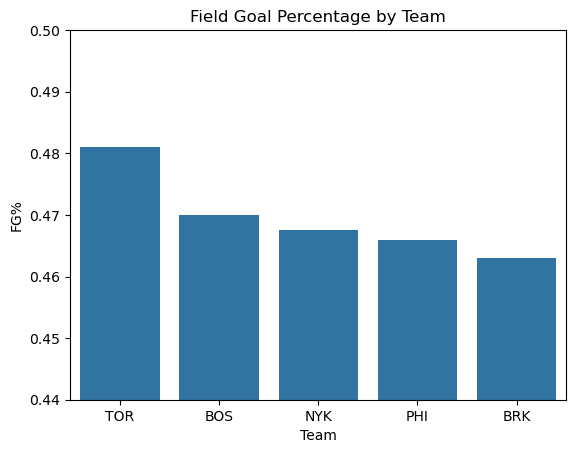

In [18]:
# Question 1: Which team had the best field goal %?

fg = data.groupby('team')['fg_pct'].mean().sort_values(ascending=False)

sns.barplot(x=fg.index, y=fg.values)
plt.title('Field Goal Percentage by Team')
plt.xlabel('Team')
plt.ylabel('FG%')
plt.ylim(0.44, 0.50)  

# Display Chart
plt.show()

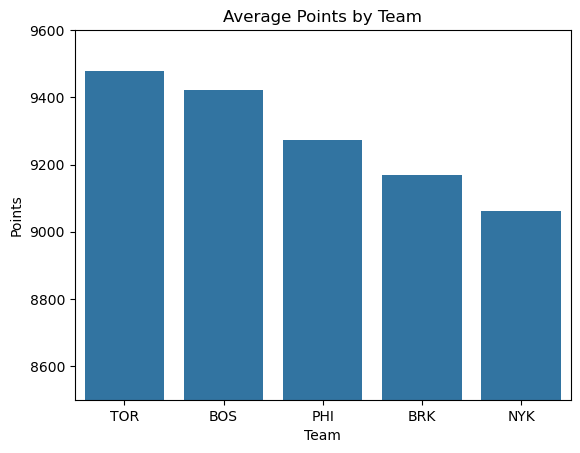

In [27]:
# Question 2: Which team scored the most total points?

pts = data.groupby('team')['pts'].mean().sort_values(ascending=False)

sns.barplot(x=pts.index, y=pts.values)
plt.title('Average Points by Team')
plt.xlabel('Team')
plt.ylabel('Points')
plt.ylim(8500, 9600)

# Display Chart
plt.show()

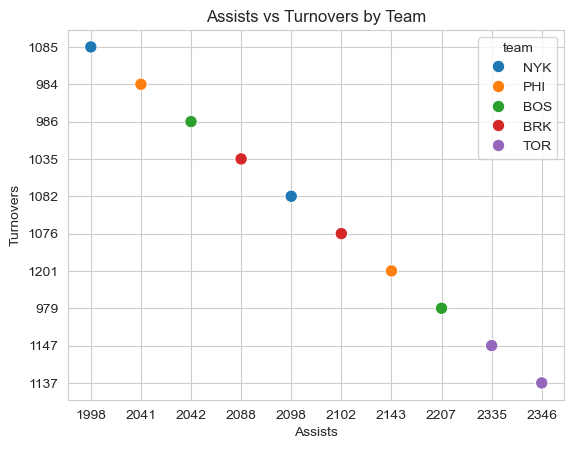

In [32]:
# Question 3: Is there a relationship between assists & turnovers?

sns.set_style("whitegrid")

# Sort by Assists
data_sorted = data.sort_values(by='ast')

sns.scatterplot(data=data_sorted, x='ast', y='tov', hue='team', s=80)
plt.title('Assists vs Turnovers by Team')
plt.xlabel('Assists')
plt.ylabel('Turnovers')

# Display Chart
plt.show()

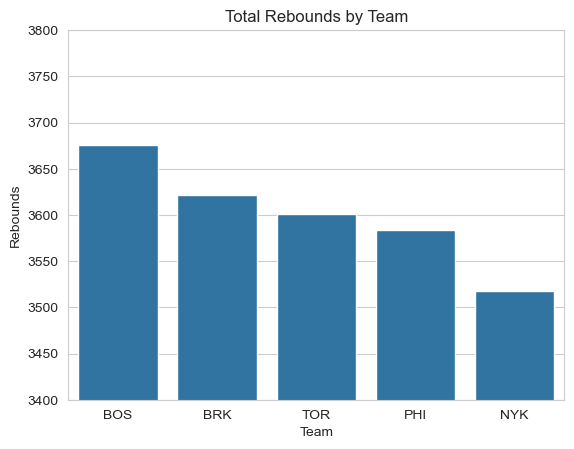

In [43]:
# Question 4: Which team rebounded the best?

reb = data.groupby('team')['trb'].mean().sort_values(ascending=False)

sns.barplot(x=reb.index, y=reb.values)
plt.title('Total Rebounds by Team')
plt.xlabel('Team')
plt.ylabel('Rebounds')
plt.ylim(3400, 3800)

# Display Chart
plt.show()

### Conclusion

After analyzing the Atlantic Division of the NBA's data:

- Toronto had the highest field goal % and total points
- New York & Philadelphia were among the worst in turnover-to-assist ratio
- Brooklyn was among the worst at pretty much everything. (Very sad as a Nets fan.)
- Boston rebounded the best.